In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
cmap = sns.cm.mako_r

%matplotlib inline

In [3]:
stroke = pd.read_csv('/Users/mino/Desktop/B.Sc (Hons) EE Enginering/Individual Research Project/Brain Stroke Prediction/healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
stroke.drop(columns=['id']).describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
stroke['age'] = stroke['age'].apply(lambda x : round(x))

#To handle outliers and invalid BMI values:
stroke['bmi'] = stroke['bmi'].apply(lambda bmi_value: bmi_value if 12 < bmi_value < 60 else np.nan)

stroke.sort_values(['gender', 'age'], inplace=True) 
stroke.reset_index(drop=True, inplace=True)

stroke['bmi'].ffill(inplace=True)
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


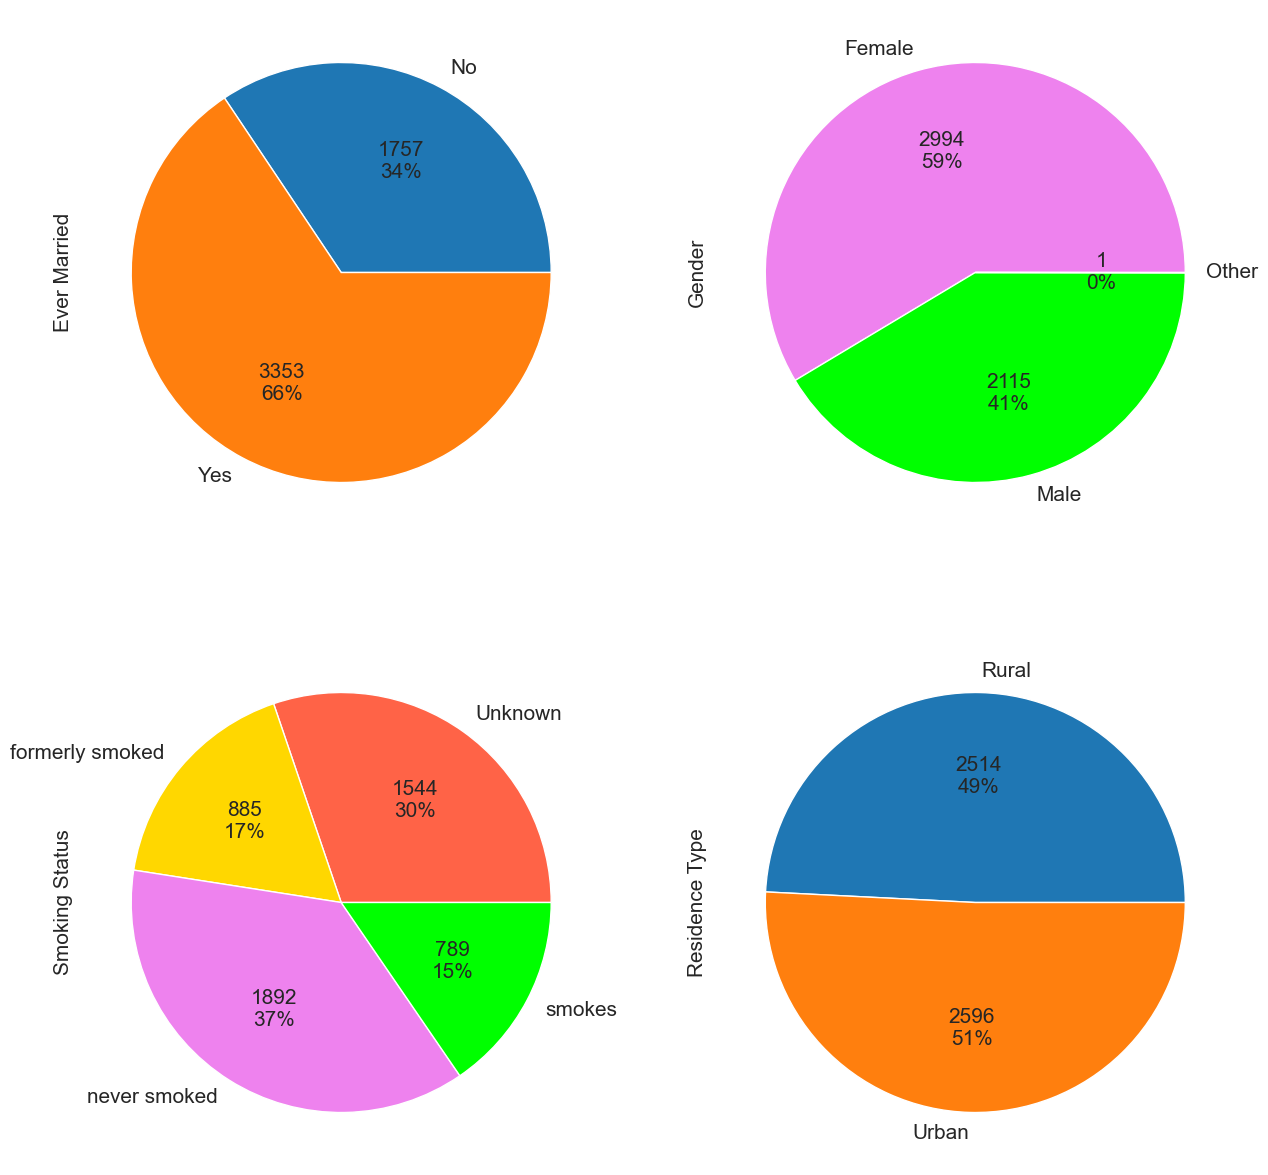

In [11]:
fig, ((ax0,ax1),(ax2,ax3))=plt.subplots(nrows=2,
                                       ncols=2,
                                       figsize=(15, 15))
def label_function(val):
    return f'{val / 100 * len(stroke):.0f}\n{val:.0f}%'

# GENDER
stroke.groupby('gender').size().plot(kind='pie', 
                                      autopct=label_function, 
                                      textprops={'fontsize': 15},
                                      colors=['violet', 'lime','tomato'],
                                      ax=ax1)
ax1.set_ylabel('Gender',size=15)

# EVER MARRIED
stroke.groupby('ever_married').size().plot(kind='pie', 
                                              autopct=label_function,
                                              textprops={'fontsize': 15},
                                              ax=ax0)
ax0.set_ylabel('Ever Married',size=15)

# SMOKING STATUS
stroke.groupby('smoking_status').size().plot(kind='pie',
                                                 autopct=label_function, 
                                                 textprops={'fontsize': 15},
                                                 colors=['tomato', 'gold','violet','lime'],
                                                 ax=ax2)
ax2.set_ylabel('Smoking Status',size=15)

# RESIDENCE TYPE 
stroke.groupby('Residence_type').size().plot(kind='pie',
                                                 autopct=label_function, 
                                                 textprops={'fontsize': 15},
                                                 ax=ax3)                                         
ax3.set_ylabel('Residence Type',size=15)

# showing the figure
fig.show()

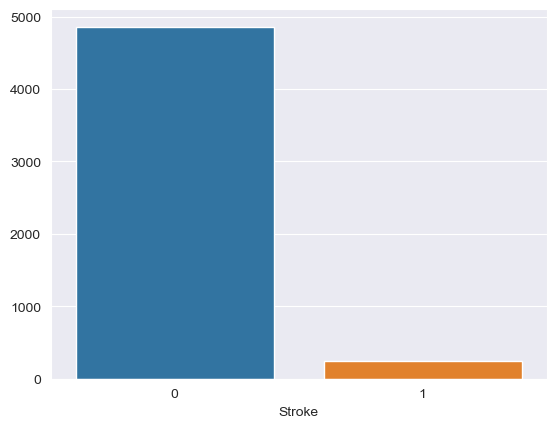

In [13]:
xs = stroke['stroke'].value_counts().index
ys = stroke['stroke'].value_counts().values

ax = sns.barplot(x=xs, y=ys)
ax.set_xlabel("Stroke")
plt.show()

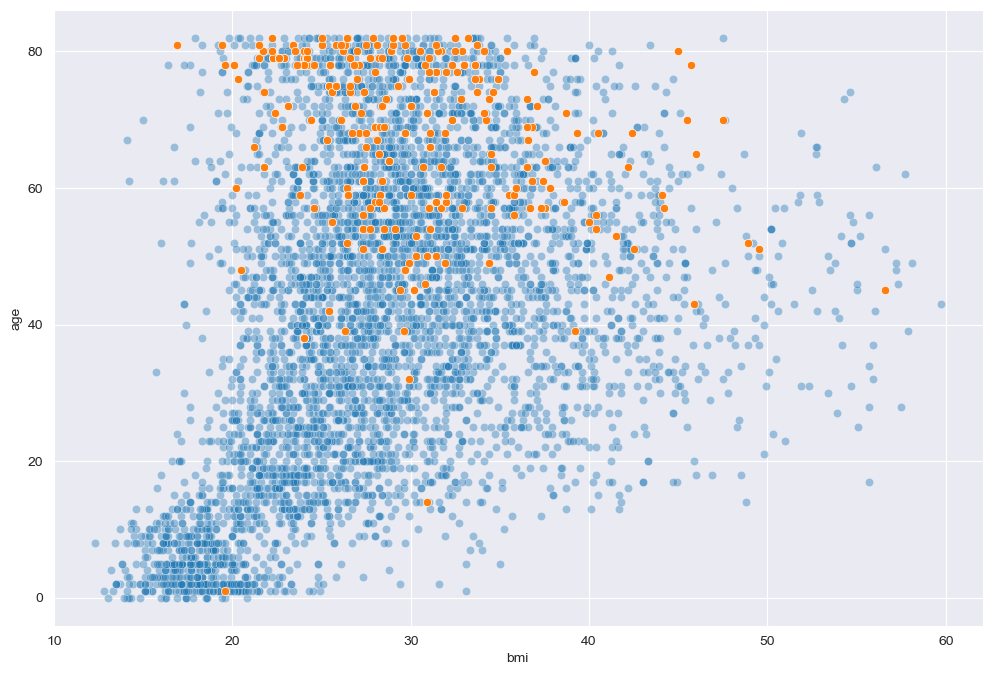

In [15]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="bmi", y="age", alpha=0.4, data=stroke[stroke['stroke'] == 0])
sns.scatterplot(x="bmi", y="age", alpha=1, data=stroke[stroke['stroke'] == 1], ax=ax)
plt.show()

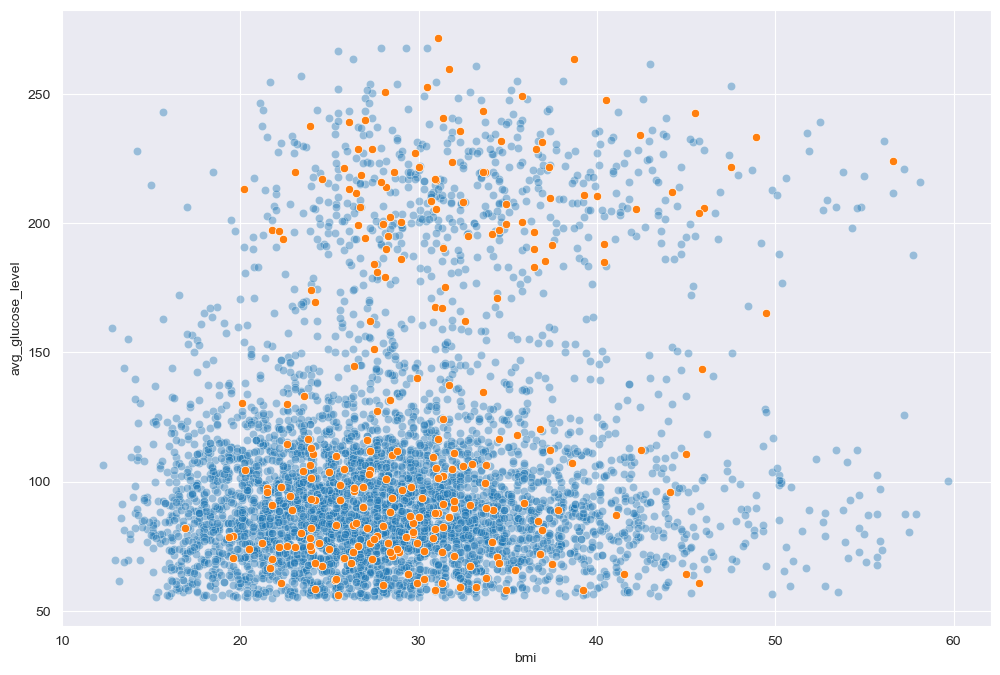

In [17]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="bmi", y="avg_glucose_level", alpha=0.4, data=stroke[stroke['stroke'] == 0])
sns.scatterplot(x="bmi", y="avg_glucose_level", alpha=1, data=stroke[stroke['stroke'] == 1], ax=ax)
plt.show()

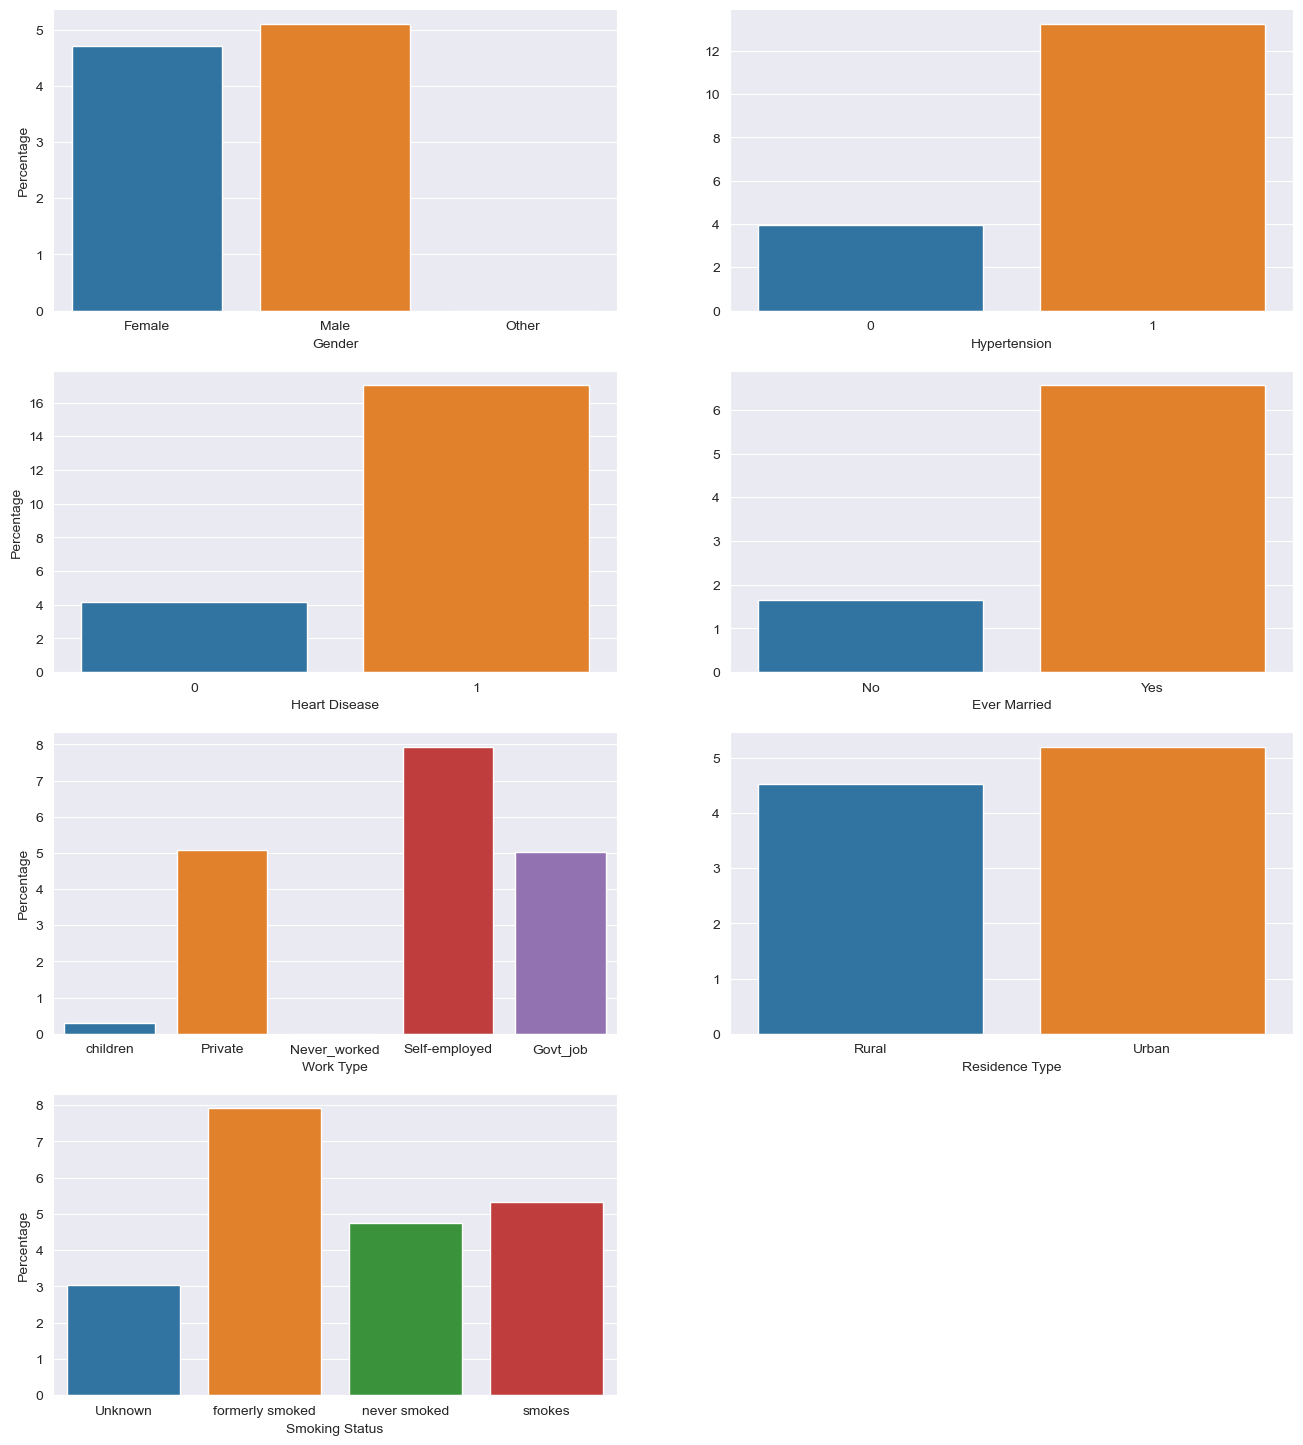

In [19]:
def plot_percent_of_stroke_in_each_category(df, column, axis):
    x_axis = []
    y_axis = []
    
    unique_values = df[column].unique()
    
    for value in unique_values:
        stroke_yes = len(df[(df[column] == value) & (df['stroke'] == 1)])
        total = len(df[df[column] == value])
        percentage = (stroke_yes / total) * 100
        x_axis.append(value)
        y_axis.append(percentage)
    
    sns.barplot(x=x_axis, y=y_axis, ax=axis)

columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
           'work_type', 'Residence_type', 'smoking_status']

fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes[3, 1].remove()

plot_percent_of_stroke_in_each_category(stroke, 'gender', axes[0, 0])
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Percentage")

plot_percent_of_stroke_in_each_category(stroke, 'hypertension', axes[0, 1])
axes[0, 1].set_xlabel("Hypertension")

plot_percent_of_stroke_in_each_category(stroke, 'heart_disease', axes[1, 0])
axes[1, 0].set_xlabel("Heart Disease")
axes[1, 0].set_ylabel("Percentage")

plot_percent_of_stroke_in_each_category(stroke, 'ever_married', axes[1, 1])
axes[1, 1].set_xlabel("Ever Married")

plot_percent_of_stroke_in_each_category(stroke, 'work_type', axes[2, 0])
axes[2, 0].set_xlabel("Work Type")
axes[2, 0].set_ylabel("Percentage")

plot_percent_of_stroke_in_each_category(stroke, 'Residence_type', axes[2, 1])
axes[2, 1].set_xlabel("Residence Type")

plot_percent_of_stroke_in_each_category(stroke, 'smoking_status', axes[3, 0])
axes[3, 0].set_xlabel("Smoking Status")
axes[3, 0].set_ylabel("Percentage")

plt.show()

In [21]:
#Categorical Data to Numerical Values
gender_dict = {'Male': 0, 'Female': 1, 'Other': 2}
smoking_status_dict = {'Unknown': 0, 'never smoked': 1, 'formerly smoked':2, 'smokes': 3}

stroke['gender'] = stroke['gender'].map(gender_dict)
stroke['smoking_status'] = stroke['smoking_status'].map(smoking_status_dict)

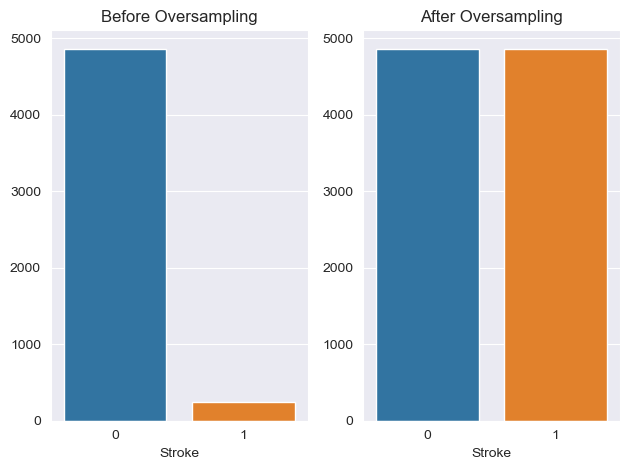

In [27]:
# Define the feature columns to use (excluding ever_married, work_type, and Residence_type)
X = stroke[['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = stroke['stroke']

fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax1)
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Stroke')

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 40) 
X, y = sm.fit_resample(X, y) 

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax2)
ax2.set_title("After Oversampling")
ax2.set_xlabel('Stroke')

plt.tight_layout()
plt.show()

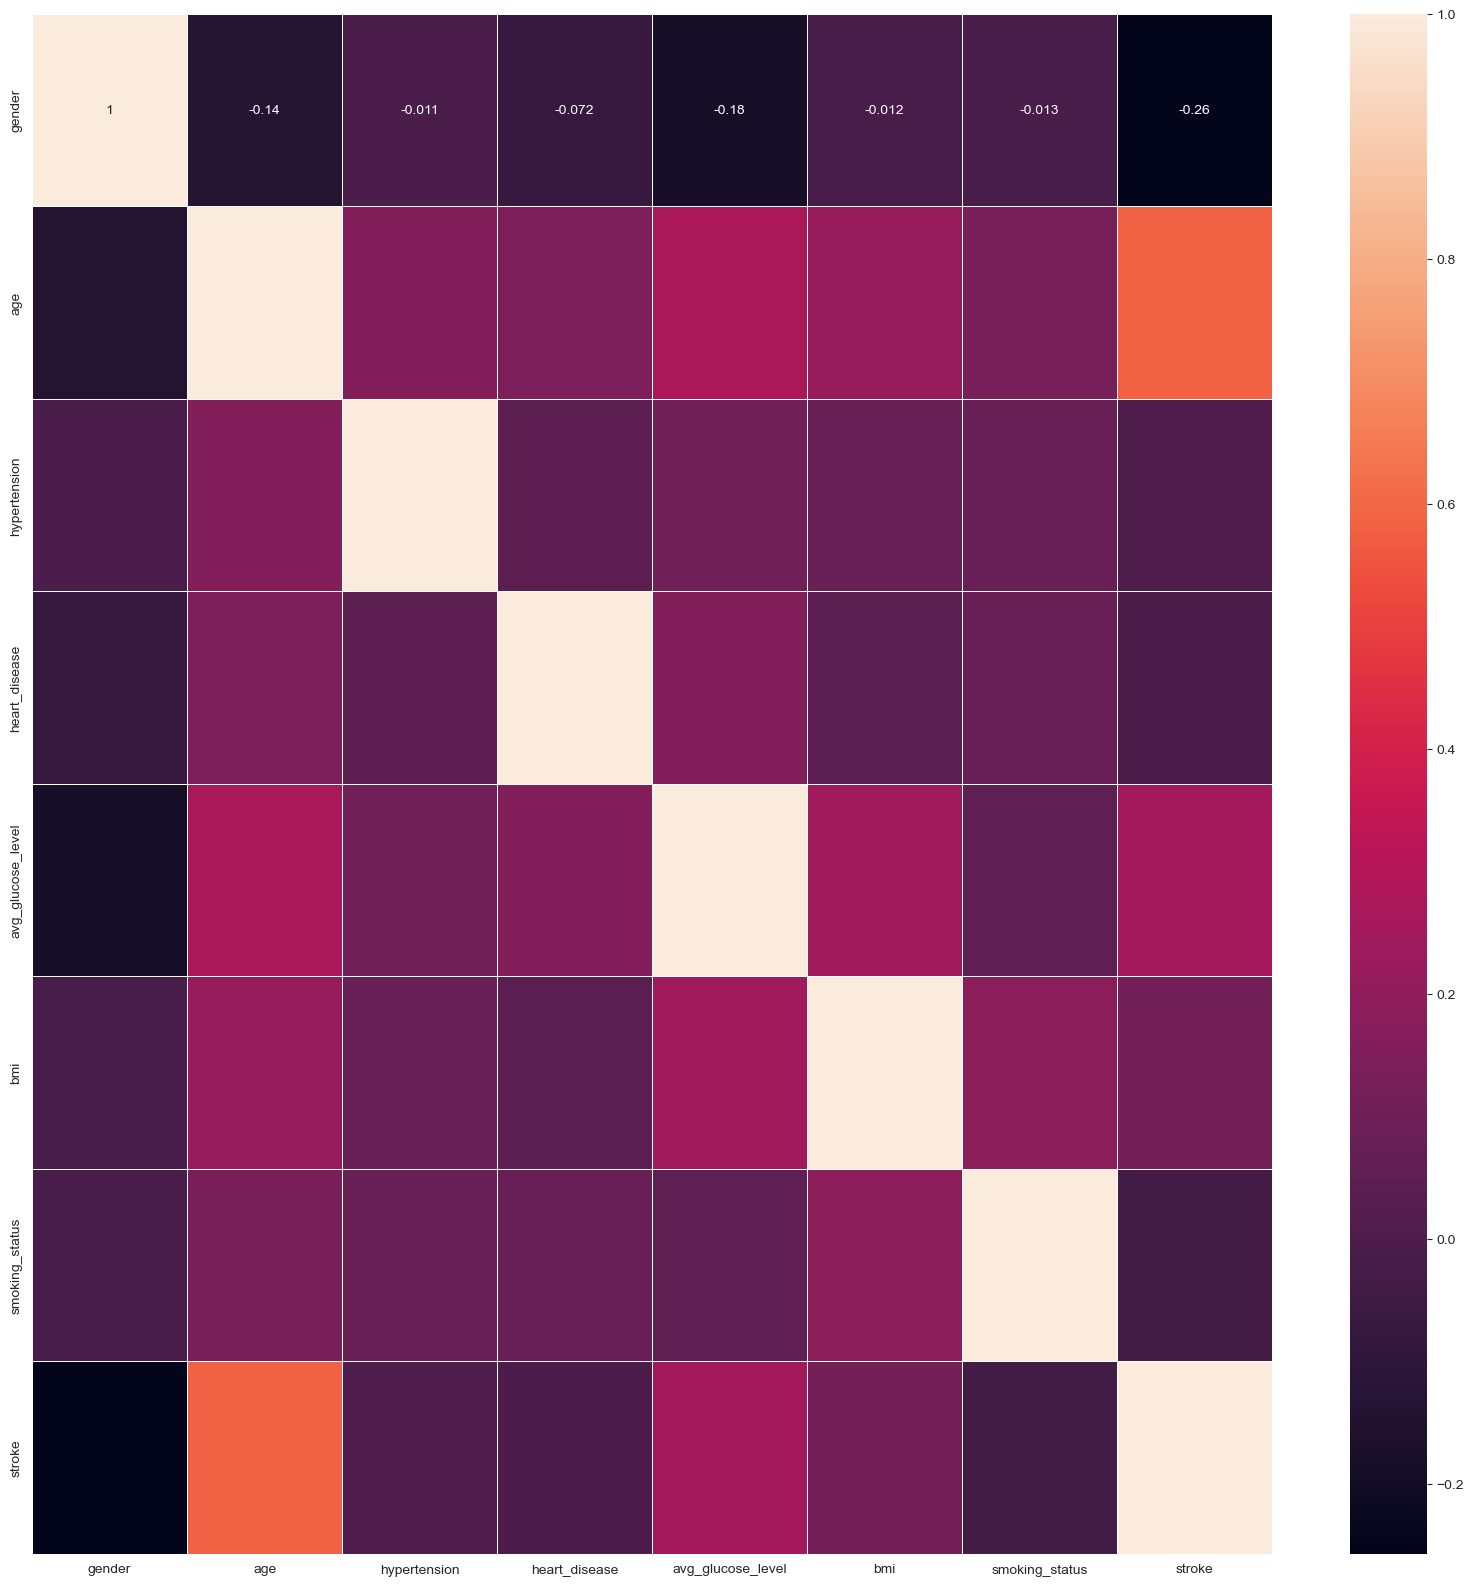

In [29]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(X.join(pd.Series(y, name='stroke')).corr(),
            annot=True,
            linewidth=.5,
            ax=ax)
fig.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from keras.regularizers import l1, l2
model = Sequential()
model.add(Dense(units=1024, activation='relu', kernel_initializer='he_uniform', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))  # Adjust l2 value
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.01)))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 708,097 (2.70 MB)

 Trainable params: 708,097 (2.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6641 - loss: 31.5282 - val_accuracy: 0.7950 - val_loss: 13.4826
Epoch 2/150
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7696 - loss: 11.1178 - val_accuracy: 0.8039 - val_loss: 5.9825
Epoch 3/150
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7740 - loss: 5.0654 - val_accuracy: 0.8169 - val_loss: 2.8466
Epoch 4/150
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7764 - loss: 2.4641 - val_accuracy: 0.8111 - val_loss: 1.4641
Epoch 5/150
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7876 - loss: 1.3191 - val_accuracy: 0.8080 - val_loss: 0.8841
Epoch 6/150
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7924 - loss: 0.8444 - val_accuracy: 0.8142 - val_loss: 0.6588
Epoch 7/150
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7765 - loss: 0.6792 - val_accuracy: 0.8121 - val_loss: 0.5882
Epoch 8/150
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7842 - loss: 0.6202 - val_a

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


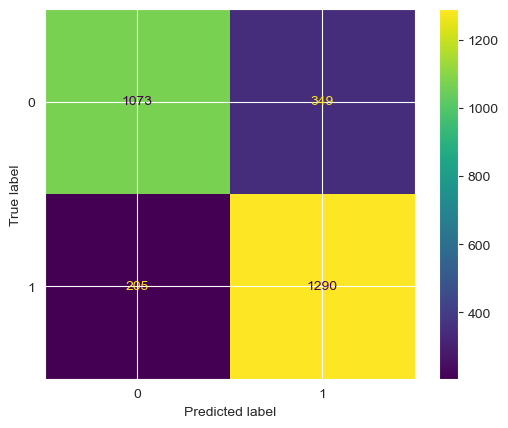

In [37]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix.numpy()).plot()
plt.show()

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.81


In [41]:
report = classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke'])
print(report)

              precision    recall  f1-score   support

   No Stroke       0.84      0.75      0.79      1422
      Stroke       0.79      0.86      0.82      1495

    accuracy                           0.81      2917
   macro avg       0.81      0.81      0.81      2917
weighted avg       0.81      0.81      0.81      2917



In [43]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7814 - loss: 0.5565
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 0.5247
Training Accuracy: 0.7876561284065247
Test Accuracy: 0.8100788593292236


In [45]:
y_train_pred = (model.predict(X_train) > 0.5).astype(int)
y_test_pred = (model.predict(X_test) > 0.5).astype(int)

print("Training Set Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Set Classification Report:\n", classification_report(y_test, y_test_pred))

213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78      3439
           1       0.75      0.85      0.80      3366

    accuracy                           0.79      6805
   macro avg       0.79      0.79      0.79      6805
weighted avg       0.79      0.79      0.79      6805

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79      1422
           1       0.79      0.86      0.82      1495

    accuracy                           0.81      2917
   macro avg       0.81      0.81      0.81      2917
weighted avg       0.81      0.81      0.81      2917



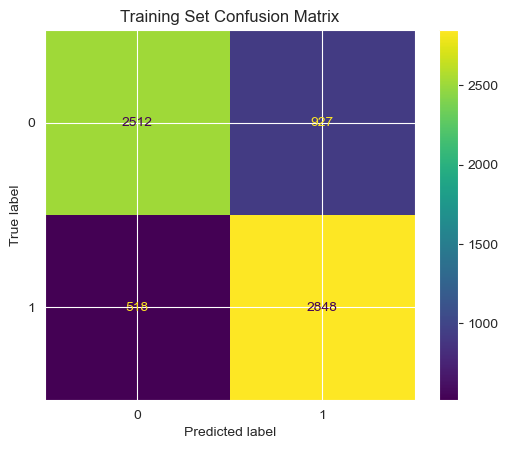

In [47]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title("Training Set Confusion Matrix")
plt.show()

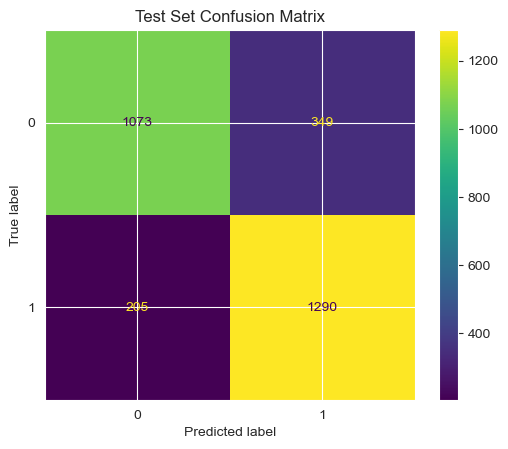

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title("Test Set Confusion Matrix")
plt.show()

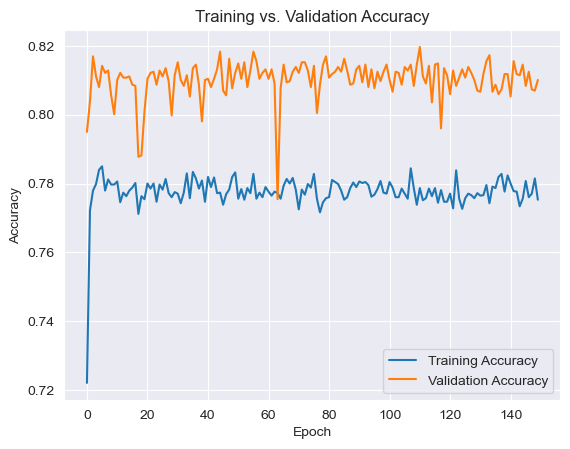

In [51]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

In [53]:
from IPython.display import display, HTML

def predict_stroke(name, gender, age, hypertension, heart_disease, avg_glucose_level, bmi, smoking_status):
    # Prepare the input data
    input_data = pd.DataFrame({
        'gender': [gender],
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'avg_glucose_level': [avg_glucose_level],
        'bmi': [bmi],
        'smoking_status': [smoking_status]
    })
    
    # Define dictionaries for categorical values
    gender_dict = {'Male': 0, 'Female': 1, 'Other': 2}
    smoking_status_dict = {'Unknown': 0, 'never smoked': 1, 'formerly smoked': 2, 'smokes': 3}
    
    # Map categorical columns to numeric values
    input_data['gender'] = input_data['gender'].map(gender_dict)
    input_data['smoking_status'] = input_data['smoking_status'].map(smoking_status_dict)
    
    # Scale the input data
    input_data = scaler.transform(input_data)

    # Make prediction
    prediction = (model.predict(input_data) > 0.5).astype("int32")
    
    # Return result
    if prediction == 0:
        return f"This predicts that {name} will not have a stroke."
    else:
        return f"This predicts that {name} will have a stroke."

In [55]:
# Enter patient data
name = 'Robert B. Weide'
gender = 'Male'
age = 24
hypertension = 0
heart_disease = 1
avg_glucose_level = 80.0
bmi = 19.8
smoking_status = 'never smoked'

result = predict_stroke(name, gender, age, hypertension, heart_disease, avg_glucose_level, bmi, smoking_status)

if "will have a stroke." in result:
    display(HTML(f'<div style="background-color:#ffcccc; padding:100px; border:1px solid red;text-align:center;"><h3>{result}</h3></div>'))
else:
    display(HTML(f'<div style="background-color:#ccffcc; padding:100px; border:1px solid green;text-align:center;"><h3>{result}</h3></div>'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
